In [1]:
# Dependencies
import sys
sys.path.append('./pca_project')

from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from src.dataBuilder import getSample, standardize, projection, loadData
from src.dataVisualization import createPlot, plotPoints, plotQuiver, runPlotActions
from src.dataVisualization import createPlotlyPlot
from src.pcaCore import computePCA, pcaEllipse2D
from src.pcaVisualize import makeSliderFunction, makePlotlySliderFunction

In [2]:
# Generate Gaussian data and take a subset
# data = generateGaussian(num_sets=1, num_points=100, dim=2, seed=42, mean=[6,10], cov=[[5,4],[4,12]])[0]
data = loadData('C:/Users/IdeRy/ml-under-the-hood/pca_project/data/generated_data/2dGaussian.npy', dtype='numpy')
df = loadData('C:/Users/IdeRy/ml-under-the-hood/pca_project/data/real_data/fighters_stats.csv', dtype='pandas')
data_subset = getSample(data, 10)
data_std = standardize(data)

C:\Users\IdeRy\AppData\Local\Temp\ipykernel_27160\2220584532.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


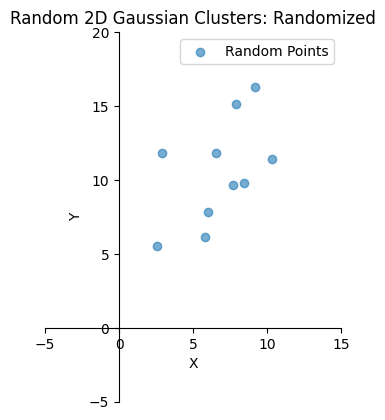

In [3]:
# Create figure and axis
fig, ax = createPlot(xlim=(-5, 15), ylim=(-5, 20), title="Random 2D Gaussian Clusters: Randomized")

# Define all actions
actions = [
    {"func": plotPoints, "args": [data_subset[:, 0], data_subset[:, 1]], "kwargs": {"alpha": 0.6, "label": "Random Points"}}
]

# Run all actions
runPlotActions(ax, actions, True)

# Show plot
fig.show();

C:\Users\IdeRy\AppData\Local\Temp\ipykernel_27160\3815329089.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


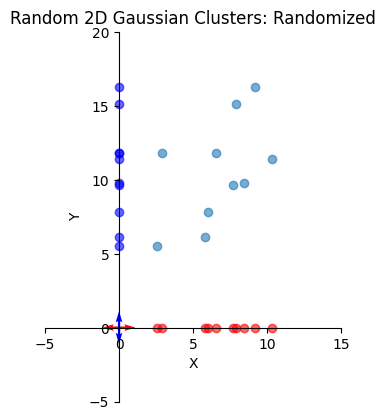

In [4]:
# Create figure and axis
fig, ax = createPlot(xlim=(-5, 15), ylim=(-5, 20), title="Random 2D Gaussian Clusters: Randomized")

# Define all actions
actions = [
    {"func": plotPoints, "args": [data_subset[:, 0], data_subset[:, 1]], "kwargs": {"alpha": 0.6}},
    {"func": plotPoints, "args": [data_subset[:, 0], np.zeros(data_subset.shape[0])], "kwargs": {"color": "red", "alpha": 0.6}},
    {"func": plotPoints, "args": [np.zeros(data_subset.shape[0]), data_subset[:, 1]], "kwargs": {"color": "blue", "alpha": 0.6}},
    {"func": plotQuiver, "args": [0, 0, 10, 0], "kwargs": {"color": "red"}},
    {"func": plotQuiver, "args": [0, 0, -10, 0], "kwargs": {"color": "red"}},
    {"func": plotQuiver, "args": [0, 0, 0, 19], "kwargs": {"color": "blue"}},
    {"func": plotQuiver, "args": [0, 0, 0, -10], "kwargs": {"color": "blue"}},
]

# Run all actions
runPlotActions(ax, actions,False)

# Show plot
fig.show();


C:\Users\IdeRy\AppData\Local\Temp\ipykernel_27160\2594169776.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


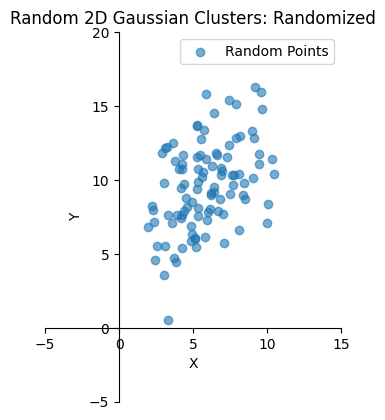

In [5]:
# Create figure and axis
fig, ax = createPlot(xlim=(-5, 15), ylim=(-5, 20), title="Random 2D Gaussian Clusters: Randomized")

# Define all actions
actions = [
    {"func": plotPoints, "args": [data[:, 0], data[:, 1]], "kwargs": {"alpha": 0.6, "label": "Random Points"}}
]

# Run all actions
runPlotActions(ax, actions, True)

# Show plot
fig.show();

C:\Users\IdeRy\AppData\Local\Temp\ipykernel_27160\3782647604.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


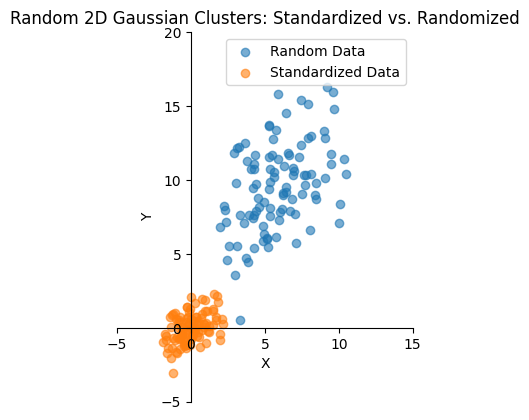

In [6]:
# Create figure and axis
fig, ax = createPlot(xlim=(-5, 15), ylim=(-5, 20), title="Random 2D Gaussian Clusters: Standardized vs. Randomized")

# Define all actions
actions = [
    {"func": plotPoints, "args": [data[:, 0], data[:, 1]], "kwargs": {"alpha": 0.6, "label": "Random Data"}},
    {"func": plotPoints, "args": [data_std[:, 0], data_std[:, 1]], "kwargs": {"alpha": 0.6, "label": "Standardized Data"}}
]

# Run all actions
runPlotActions(ax, actions, True)

# Show plot
fig.show();

C:\Users\IdeRy\AppData\Local\Temp\ipykernel_27160\3731888649.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


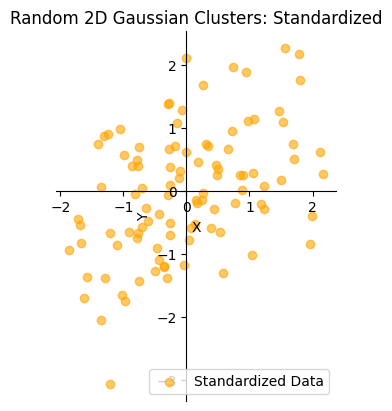

In [7]:
# Create figure and axis
fig, ax = createPlot(title="Random 2D Gaussian Clusters: Standardized")

# Define all actions
actions = [
    {"func": plotPoints, "args": [data_std[:, 0], data_std[:, 1]], "kwargs": {"color": 'orange', "alpha": 0.6, "label": "Standardized Data"}}
]

# Run all actions
runPlotActions(ax, actions, True)

# Show plot
fig.show();

C:\Users\IdeRy\AppData\Local\Temp\ipykernel_27160\3787890443.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


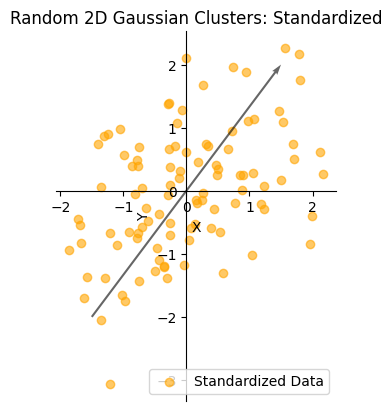

In [8]:
# Create figure and axis
fig, ax = createPlot(title="Random 2D Gaussian Clusters: Standardized")

# Define all actions
actions = [
    {"func": plotPoints, "args": [data_std[:, 0], data_std[:, 1]], "kwargs": {"color": 'orange', "alpha": 0.6, "label": "Standardized Data"}},
    {"func": plotQuiver, "args": [-1.5, -2, 6, 8], "kwargs": {"alpha": 0.6, "scale": 2}}
]

# Run all actions
runPlotActions(ax, actions, True)

# Show plot
fig.show();

C:\Users\IdeRy\AppData\Local\Temp\ipykernel_27160\2747081621.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


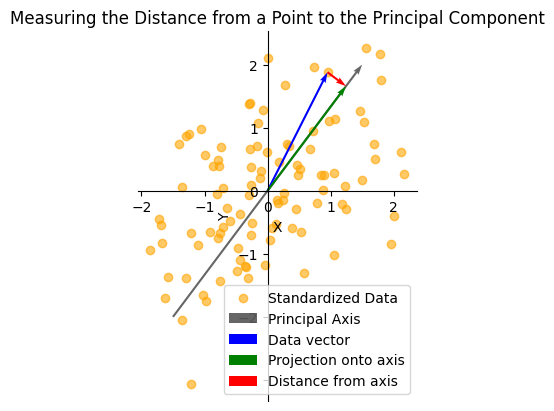

In [9]:
# Create figure and axis
fig, ax = createPlot(title="Measuring the Distance from a Point to the Principal Component")

# Calculate sample projection
u = np.array([3, 4]) # Our Principal Component
v = data_std[10] # A data point
proj = projection(u, v)

# Define all actions
actions = [
    {"func": plotPoints, "args": [data_std[:, 0], data_std[:, 1]], "kwargs": {"color": 'orange', "alpha": 0.6, "label": "Standardized Data"}},
    {"func": plotQuiver, "args": [-1.5, -2, 6, 8], "kwargs": {"alpha": 0.6, "scale": 2, "label": "Principal Axis"}},
    {"func": plotQuiver, "args": [0, 0, data_std[10][0], data_std[10][1]], "kwargs": {"scale": 1, "color": 'blue', "label": 'Data vector'}}, # vector v
    {"func": plotQuiver, "args": [0, 0, proj[0], proj[1]], "kwargs": {"scale": 1, "color": 'green', "label": 'Projection onto axis'}}, # project
    {"func": plotQuiver, "args": [data_std[10][0], data_std[10][1], proj[0]-data_std[10][0], proj[1]-data_std[10][1],], "kwargs": {"scale": 1, "color": 'red', "label": 'Distance from axis'}} # # residual vector
]

# Run all actions
runPlotActions(ax, actions, True)

# Show plot
fig.show();

C:\Users\IdeRy\AppData\Local\Temp\ipykernel_27160\3957956580.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


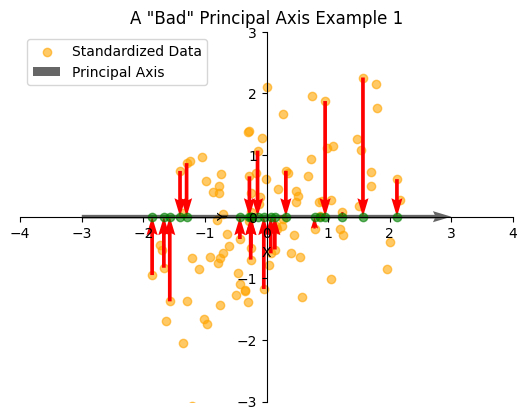

In [10]:
# Create figure and axis
fig, ax = createPlot(xlim=(-4, 4), ylim=(-3, 3), title='A "Bad" Principal Axis Example 1')

# Define all actions
actions = [
    {"func": plotPoints, "args": [data_std[:, 0], data_std[:, 1]], "kwargs": {"color": 'orange', "alpha": 0.6, "label": "Standardized Data"}},
    {"func": plotQuiver, "args": [-3, 0, 3-(-3), 0], "kwargs": {"alpha": 0.6, "scale": 1, "label": "Principal Axis"}},
]

# {"func": plotQuiver, "args": [data_std[10][0], data_std[10][1], proj[0]-data_std[10][0], proj[1]-data_std[10][1],], "kwargs": {"scale": 1, "color": 'red', "label": 'Distance from axis'}} # # residual vector

np.random.seed(42)
for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
    proj_i = projection(np.array([3-(-3), 0]), data_std[i])
    actions.append(
        {"func": plotQuiver, "args": [data_std[i][0], data_std[i][1], proj_i[0]-data_std[i][0], proj_i[1]-data_std[i][1],], "kwargs": {"scale": 1, "color": 'red'}} # residual vector
    )
    actions.append(
        {"func": plotPoints, "args": [proj_i[0], proj_i[1]], "kwargs": {"color": 'green', "alpha": 0.6}} # projection points
    )

# Run all actions
runPlotActions(ax, actions, True)

# Show plot
fig.show();

C:\Users\IdeRy\AppData\Local\Temp\ipykernel_27160\3065141326.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


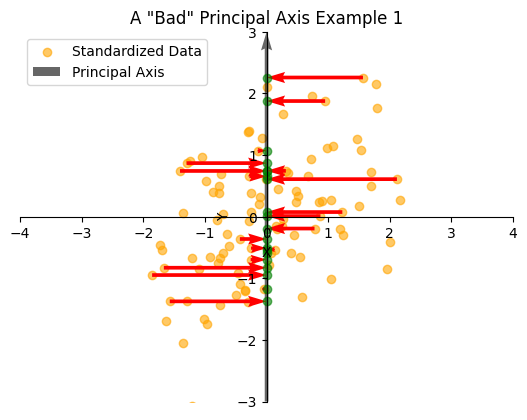

In [11]:
# Create figure and axis
fig, ax = createPlot(xlim=(-4, 4), ylim=(-3, 3), title='A "Bad" Principal Axis Example 1')

# Define all actions
actions = [
    {"func": plotPoints, "args": [data_std[:, 0], data_std[:, 1]], "kwargs": {"color": 'orange', "alpha": 0.6, "label": "Standardized Data"}},
    {"func": plotQuiver, "args": [0, -3, 0, 3-(-3)], "kwargs": {"alpha": 0.6, "scale": 1, "label": "Principal Axis"}},
]

# {"func": plotQuiver, "args": [data_std[10][0], data_std[10][1], proj[0]-data_std[10][0], proj[1]-data_std[10][1],], "kwargs": {"scale": 1, "color": 'red', "label": 'Distance from axis'}} # # residual vector

np.random.seed(42)
for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
    proj_i = projection(np.array([0, 3-(-3)]), data_std[i])
    actions.append(
        {"func": plotQuiver, "args": [data_std[i][0], data_std[i][1], proj_i[0]-data_std[i][0], proj_i[1]-data_std[i][1],], "kwargs": {"scale": 1, "color": 'red'}} # residual vector
    )
    actions.append(
        {"func": plotPoints, "args": [proj_i[0], proj_i[1]], "kwargs": {"color": 'green', "alpha": 0.6}} # projection points
    )

# Run all actions
runPlotActions(ax, actions, True)

# Show plot
fig.show();

C:\Users\IdeRy\AppData\Local\Temp\ipykernel_27160\4094875885.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


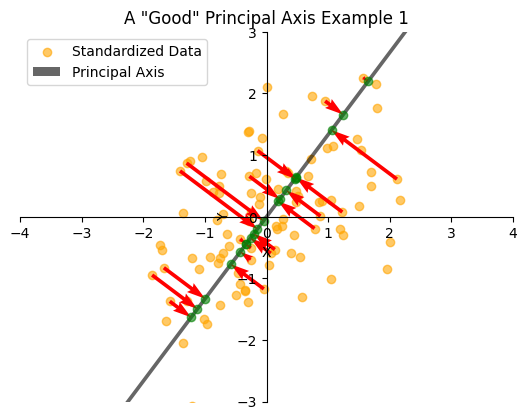

In [12]:
# Create figure and axis
fig, ax = createPlot(xlim=(-4, 4), ylim=(-3, 3), title='A "Good" Principal Axis Example 1')

# Define all actions
actions = [
    {"func": plotPoints, "args": [data_std[:, 0], data_std[:, 1]], "kwargs": {"color": 'orange', "alpha": 0.6, "label": "Standardized Data"}},
    {"func": plotQuiver, "args": [-3, -4, 3-(-3), 4-(-4)], "kwargs": {"alpha": 0.6, "scale": 1, "label": "Principal Axis"}},
]

# {"func": plotQuiver, "args": [data_std[10][0], data_std[10][1], proj[0]-data_std[10][0], proj[1]-data_std[10][1],], "kwargs": {"scale": 1, "color": 'red', "label": 'Distance from axis'}} # # residual vector

np.random.seed(42)
for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
    proj_i = projection(np.array([3-(-3), 4-(-4)]), data_std[i])
    actions.append(
        {"func": plotQuiver, "args": [data_std[i][0], data_std[i][1], proj_i[0]-data_std[i][0], proj_i[1]-data_std[i][1],], "kwargs": {"scale": 1, "color": 'red'}} # residual vector
    )
    actions.append(
        {"func": plotPoints, "args": [proj_i[0], proj_i[1]], "kwargs": {"color": 'green', "alpha": 0.6}} # projection points
    )

# Run all actions
runPlotActions(ax, actions, True)

# Show plot
fig.show();

In [13]:
eigvals, eigvecs = computePCA(data_std)
mean, width, height = pcaEllipse2D(eigvals, eigvecs, data_std)
fig, ax = createPlot(xlim=(-4, 4), ylim=(-4, 4), title='Can You Find the "Right" Principal Component?', show=False)


In [14]:
interact(
    makeSliderFunction(fig, ax),
    angle=(0, 360, 1),
    data=fixed(data_std),
    eigvals=fixed(eigvals),
    eigvecs=fixed(eigvecs),
    mean=fixed(mean),
    width=fixed(width),
    height=fixed(height),
    length_pc=fixed(4),
    _z=fixed(2.0),
    seed=fixed(42),
    drawEllipse=fixed(True),
    drawPrincipalComponents=fixed(True)
)

interactive(children=(IntSlider(value=180, description='angle', max=360), Output()), _dom_classes=('widget-int…

<function src.pcaVisualize.makeSliderFunction.<locals>.sliderFunction(angle, data, eigvals, eigvecs, mean, width, height, length_pc, _z=2.0, seed=42, drawEllipse=False, drawPrincipalComponents=True)>

In [15]:
# Create figure
fig = createPlotlyPlot(
    data=None,
    x=None,
    y=None,
    xlim=(-4, 4),
    ylim=(-4, 4),
    title='Can You Find the "Right" Principal Component?'
)

# Create slider-based interactive function
interact(
    makePlotlySliderFunction(fig),
    angle=(0, 360, 1),
    data=fixed(data_std),
    eigvals=fixed(eigvals),
    eigvecs=fixed(eigvecs),
    mean=fixed(mean),
    width=fixed(width),
    height=fixed(height),
    length_pc=fixed(4),
    _z=fixed(2.0),
    seed=fixed(42),
    drawEllipse=fixed(True),
    drawPrincipalComponents=fixed(True)
);

interactive(children=(IntSlider(value=180, description='angle', max=360), Output()), _dom_classes=('widget-int…